In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import davies_bouldin_score
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn_som.som import SOM

## Generate Datasets

In [3]:
data_1, data_y_1 = make_classification(n_samples=300, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=100)

In [4]:
data_2, data_y_2 = make_classification(n_samples=350, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=100)

In [5]:
data_3, data_y_3 = make_classification(n_samples=400, n_classes=2, n_features=2, n_redundant=0, n_clusters_per_class=2, flip_y=0, random_state=100)

## Visualisation

## 1

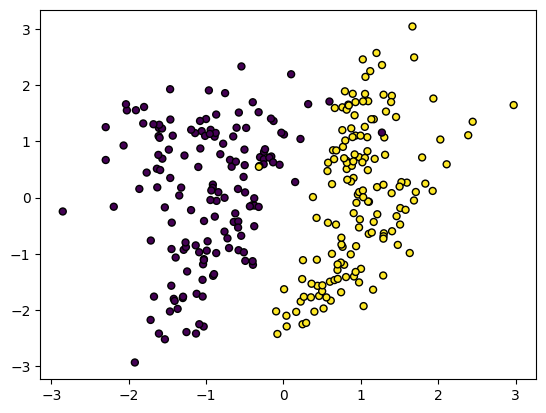

In [6]:
plt.scatter(data_1[:, 0], data_1[:, 1], marker="o", c=data_y_1, s=25, edgecolor="k")
plt.show()

## 2

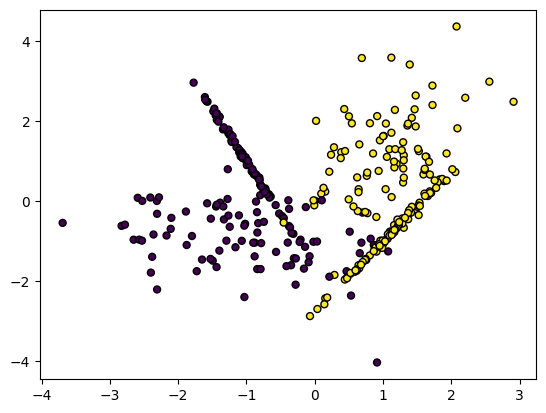

In [7]:
plt.scatter(data_2[:, 0], data_2[:, 1], marker="o", c=data_y_2, s=25, edgecolor="k")
plt.show()

## 3

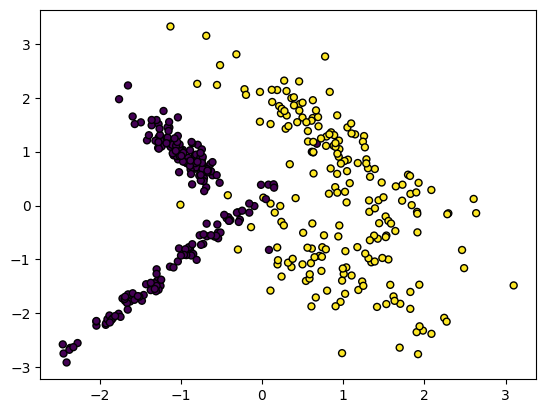

In [8]:
plt.scatter(data_3[:, 0], data_3[:, 1], marker="o", c=data_y_3, s=25, edgecolor="k")
plt.show()

## KMeans

## 1

### Search optimal number of clusters

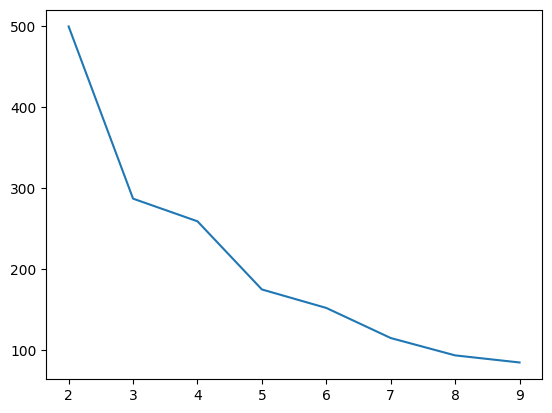

In [9]:
inertias = []

for k in range(2, 10):
    inertias.append(KMeans(k, n_init='auto').fit(data_1).inertia_)

plt.plot(range(2,10), inertias)

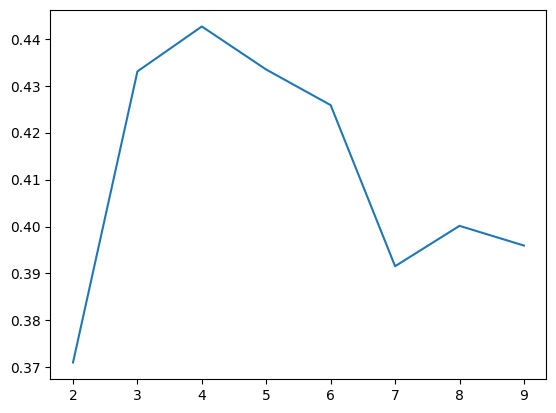

In [10]:
ss = []

for i in range(2, 10):    
    ss.append(silhouette_score(data_1, KMeans(i, n_init='auto').fit(data_1).labels_))

plt.plot(range(2,10), ss)

### FIT

In [11]:
kmeans_1 = KMeans(3, n_init='auto').fit(data_1)

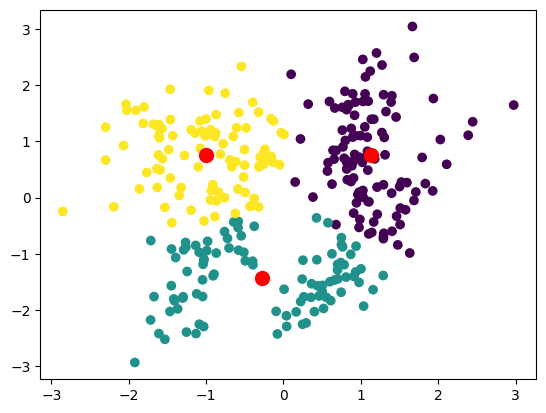

In [12]:
plt.scatter(data_1[:,0], data_1[:,1], c=kmeans_1.labels_)
plt.scatter(kmeans_1.cluster_centers_[:,0], kmeans_1.cluster_centers_[:,1], s=100, c='red')

### Metrics

In [16]:
print(rand_score(kmeans_1.labels_, data_y_1))
print(jaccard_score(kmeans_1.labels_, data_y_1, average="micro"))
print(silhouette_score(data_1, kmeans_1.labels_))
print(davies_bouldin_score(data_1,  kmeans_1.labels_))

0.6996209587513935
0.09689213893967093
0.4333759566679107
0.7901747379985542


## 2

### Search optimal number of clusters

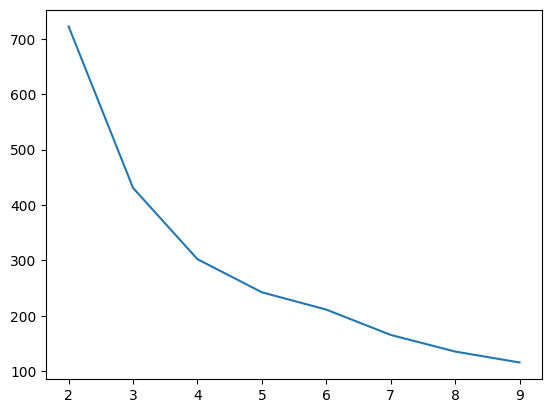

In [17]:
inertias = []

for k in range(2, 10):
    inertias.append(KMeans(k, n_init='auto').fit(data_2).inertia_)

plt.plot(range(2,10), inertias)

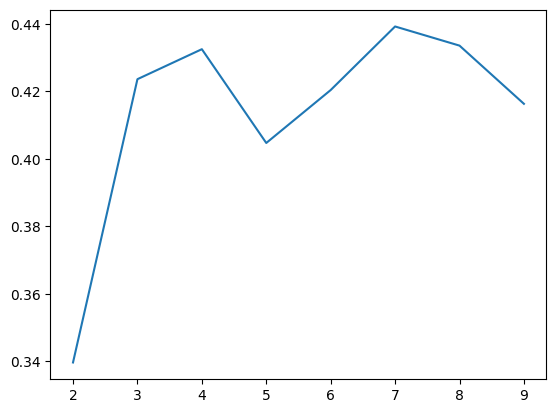

In [18]:
ss = []

for i in range(2, 10):    
    ss.append(silhouette_score(data_2, KMeans(i, n_init='auto').fit(data_2).labels_))

plt.plot(range(2,10), ss)

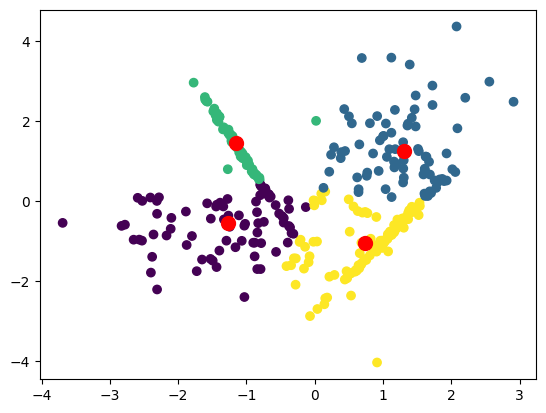

In [19]:
kmeans_2 = KMeans(4, n_init='auto').fit(data_2)
plt.scatter(data_2[:,0], data_2[:,1], c=kmeans_2.labels_)
plt.scatter(kmeans_2.cluster_centers_[:,0], kmeans_2.cluster_centers_[:,1], s=100, c='red')

### Metrics


In [20]:
print(rand_score(kmeans_2.labels_, data_y_2))
print(jaccard_score(kmeans_2.labels_, data_y_2, average="micro"))
print(silhouette_score(data_2, kmeans_2.labels_))
print(davies_bouldin_score(data_2,  kmeans_2.labels_))

0.680196479738027
0.32575757575757575
0.432463619457669
0.7677026287723576


## 3

### Search optimal number of clusters


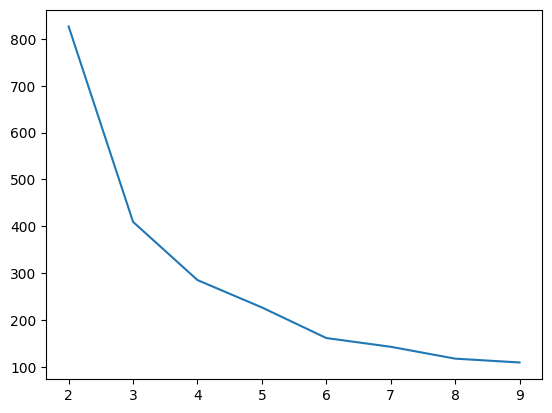

In [21]:
inertias = []

for k in range(2, 10):
    inertias.append(KMeans(k, n_init='auto').fit(data_3).inertia_)

plt.plot(range(2,10), inertias)

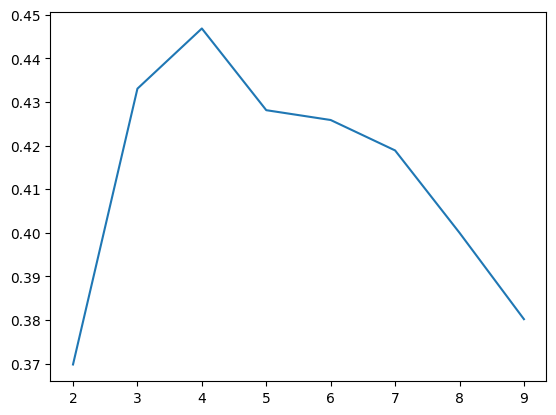

In [22]:
ss = []

for i in range(2, 10):    
    ss.append(silhouette_score(data_1, KMeans(i, n_init='auto').fit(data_1).labels_))

plt.plot(range(2,10), ss)

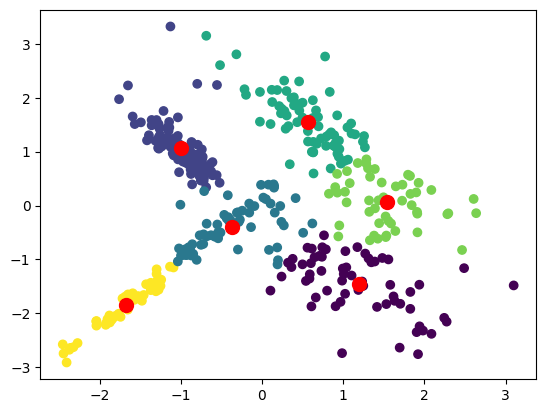

In [23]:
kmeans_3 = KMeans(6, n_init='auto').fit(data_3)
plt.scatter(data_3[:,0], data_3[:,1], c=kmeans_3.labels_)
plt.scatter(kmeans_3.cluster_centers_[:,0], kmeans_3.cluster_centers_[:,1], s=100, c='red')

### Metrics

In [24]:
print(rand_score(kmeans_3.labels_, data_y_3))
print(jaccard_score(kmeans_3.labels_, data_y_3, average="micro"))
print(silhouette_score(data_3, kmeans_3.labels_))
print(davies_bouldin_score(data_3,  kmeans_3.labels_))

0.6463659147869674
0.0037641154328732747
0.5002119664667382
0.6803768518902239


## DBSCAN

In [64]:
params = {"eps": np.linspace(0.2, 0.5, 4), "min_samples": range(5, 10)}
gs = GridSearchCV(DBSCAN(), params, cv=3, scoring='rand_score')
gs.fit(data_1)


F:\venv1\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\venv1\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
F:\venv1\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\venv1\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
F:\venv1\venv\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=3, estimator=DBSCAN(),
             param_grid={'eps': array([0.2, 0.3, 0.4, 0.5]),
                         'min_samples': range(5, 10)},
             scoring='rand_score')

In [65]:
gs.best_params_

{'eps': 0.2, 'min_samples': 5}

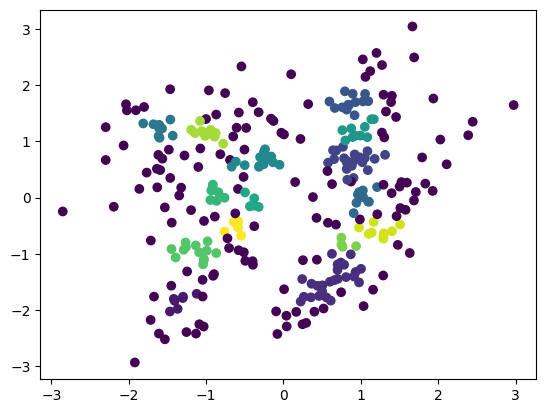

In [66]:
dbscan = DBSCAN(eps=gs.best_params_["eps"], min_samples=gs.best_params_["min_samples"]).fit(data_1)
plt.scatter(data_1[:,0], data_1[:,1], c=dbscan.labels_)

### Metrics

In [67]:
print(rand_score(dbscan.labels_, data_y_1))
print(jaccard_score(dbscan.labels_, data_y_1, average="micro"))
print(silhouette_score(data_1, dbscan.labels_))
print(davies_bouldin_score(data_1, dbscan.labels_))

0.5263991081382385
0.056338028169014086
-0.052682297864325
2.08100229996717


## 2

In [68]:
gs = GridSearchCV(DBSCAN(), params, cv=3, scoring='rand_score')
gs.fit(data_2)

F:\venv1\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\venv1\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
F:\venv1\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\venv1\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
F:\venv1\venv\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=3, estimator=DBSCAN(),
             param_grid={'eps': array([0.2, 0.3, 0.4, 0.5]),
                         'min_samples': range(5, 10)},
             scoring='rand_score')

In [69]:
gs.best_params_

{'eps': 0.2, 'min_samples': 5}

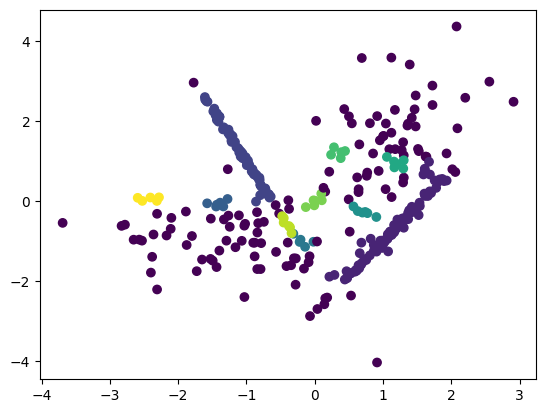

In [70]:
dbscan = DBSCAN(eps=gs.best_params_["eps"], min_samples=gs.best_params_["min_samples"]).fit(data_2)
plt.scatter(data_2[:,0], data_2[:,1], c=dbscan.labels_)

### Metrics

In [71]:
print(rand_score(dbscan.labels_, data_y_2))
print(jaccard_score(dbscan.labels_, data_y_2, average="micro"))
print(silhouette_score(data_2, dbscan.labels_))
print(davies_bouldin_score(data_2, dbscan.labels_))

0.61316414244781
0.010101010101010102
-0.13560329934003262
4.31605573938742


## 3

In [72]:
gs = GridSearchCV(DBSCAN(), params, cv=3, scoring='rand_score')
gs.fit(data_3)

F:\venv1\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\venv1\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
F:\venv1\venv\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "F:\venv1\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
F:\venv1\venv\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=3, estimator=DBSCAN(),
             param_grid={'eps': array([0.2, 0.3, 0.4, 0.5]),
                         'min_samples': range(5, 10)},
             scoring='rand_score')

In [73]:
gs.best_params_

{'eps': 0.2, 'min_samples': 5}

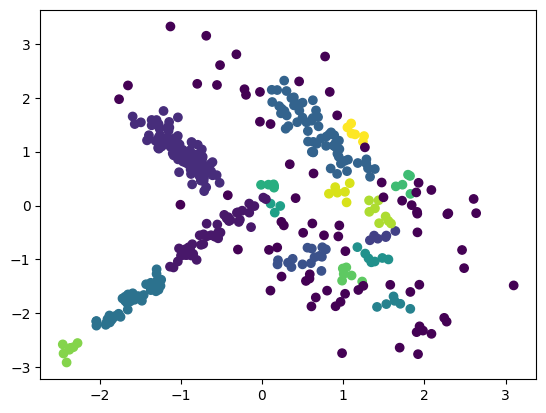

In [74]:
dbscan = DBSCAN(eps=gs.best_params_["eps"], min_samples=gs.best_params_["min_samples"]).fit(data_3)
plt.scatter(data_3[:,0], data_3[:,1], c=dbscan.labels_)

### Metrics

In [75]:
print(rand_score(dbscan.labels_, data_y_3))
print(jaccard_score(dbscan.labels_, data_y_3, average="micro"))
print(silhouette_score(data_3, dbscan.labels_))
print(davies_bouldin_score(data_3, dbscan.labels_))

0.6333834586466165
0.0582010582010582
0.19663376438212551
1.9736650611972546


0.19663376438212551
1.9736650611972546


## GaussianMixture, EM

## 1

In [76]:
parameters = {"n_components" : range(2, 10)}
gs = GridSearchCV(GaussianMixture(), parameters, cv=3)
gs.fit(data_1)

GridSearchCV(cv=3, estimator=GaussianMixture(),
             param_grid={'n_components': range(2, 10)})

In [77]:
gs.best_params_

{'n_components': 4}

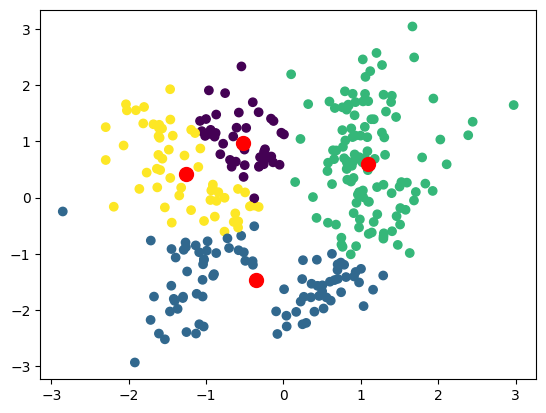

In [78]:
gm = GaussianMixture(n_components=gs.best_params_['n_components']).fit(data_1)

plt.scatter(data_1[:,0], data_1[:,1], c=gm.predict(data_1))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

### Metrics

In [79]:
print(rand_score(gm.predict(data_1), data_y_1))
print(jaccard_score(gm.predict(data_1), data_y_1, average="micro"))
print(silhouette_score(data_1, gm.predict(data_1)))
print(davies_bouldin_score(data_1, gm.predict(data_1)))

0.6710590858416945
0.15606936416184972
0.312862088904623
1.1088787013373338


## 2

In [80]:
gs = GridSearchCV(GaussianMixture(), parameters, cv=3)
gs.fit(data_2)

GridSearchCV(cv=3, estimator=GaussianMixture(),
             param_grid={'n_components': range(2, 10)})

In [81]:
gs.best_params_

{'n_components': 4}

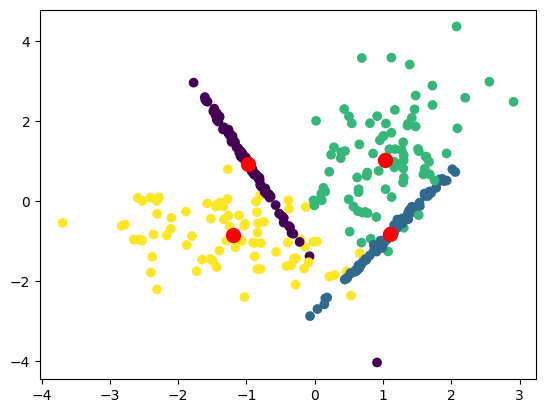

In [82]:
gm = GaussianMixture(n_components=gs.best_params_['n_components']).fit(data_2)

plt.scatter(data_2[:,0], data_2[:,1], c=gm.predict(data_2))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

### Metrics

In [83]:
print(rand_score(gm.predict(data_2), data_y_2))
print(jaccard_score(gm.predict(data_2), data_y_2, average="micro"))
print(silhouette_score(data_2, gm.predict(data_2)))
print(davies_bouldin_score(data_2, gm.predict(data_2)))

0.722865329512894
0.34615384615384615
0.31386526533759623
0.9888367461129299


## 3

In [84]:
gs = GridSearchCV(GaussianMixture(), parameters, cv=3)
gs.fit(data_2)

GridSearchCV(cv=3, estimator=GaussianMixture(),
             param_grid={'n_components': range(2, 10)})

In [85]:
gs.best_params_

{'n_components': 4}

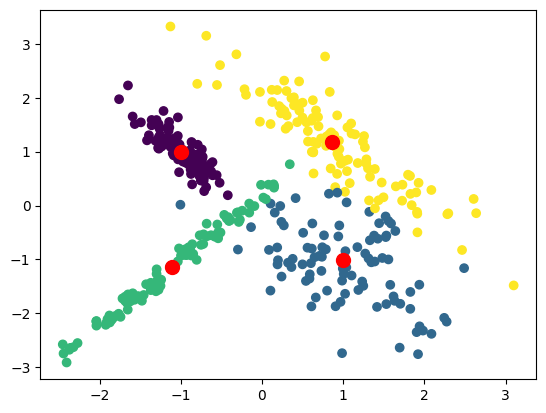

In [86]:
gm = GaussianMixture(n_components=gs.best_params_['n_components']).fit(data_3)

plt.scatter(data_3[:,0], data_3[:,1], c=gm.predict(data_3))
plt.scatter(gm.means_[:,0], gm.means_[:,1], s=100, c='red')

### Metrics

In [87]:
print(rand_score(gm.predict(data_3), data_y_3))
print(jaccard_score(gm.predict(data_3), data_y_3, average="micro"))
print(silhouette_score(data_3, gm.predict(data_3)))
print(davies_bouldin_score(data_3, gm.predict(data_3)))

0.735375939849624
0.309328968903437
0.4447452191048153
0.7853645465538167


## Implementation KMeans

In [95]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(sample_1, sample_2):
    return np.sqrt(np.sum((sample_1-sample_2)**2))

class KMeans:

    def __init__(self, K=3, max_iters=100):
        
        self.K = K
        self.max_iters = max_iters
        
        self.clusters = [[] for i in range(self.K)]  # список индексов объектов каждого кластера 
        self.centroids = []   #центры кластеров

    def predict(self, X):
        
        self.X = X
        centroids_idxs = np.random.choice(self.X.shape[0], self.K, replace=False) #выбор K различных центров кластеров
        self.centroids = [self.X[i] for i in centroids_idxs]

        for iter in range(self.max_iters):
            
            self.clusters = self.create_clusters(self.centroids)  #назначение объекта к ближайшему центроиду
            centroids_old = self.centroids
            self.centroids = self.new_centroids(self.clusters)  #вычисление новых центроидов
            
            distances = [euclidean_distance(centroids_old[i], self.centroids[i]) for i in range(self.K)]
            if sum(distances) == 0:
                break

        return self.get_predictions(self.clusters)   # получение меток
 
    def get_predictions(self, clusters):
        
        # назначение кластеров объектам
        
        predictions = np.empty(self.X.shape[0])
        for cluster_idx, cluster in enumerate(clusters):
            for idx in cluster:
                predictions[idx] = cluster_idx

        return predictions

    def create_clusters(self, centroids):

        clusters = [[] for i in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self.closest_centroid(sample, centroids)  ## расчет расстояния от объекта до центроидов, выбор min
            clusters[centroid_idx].append(idx)
        return clusters

    def closest_centroid(self, sample, centroids):
        
        #определение расстояние от объекта до каждого центроида
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def new_centroids(self, clusters):
        
        # расчет среднего значения
        
        centroids = np.zeros((self.K, self.X.shape[1]))
        for cluster_idx, cluster in enumerate(clusters):
            mean_value_cluster = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = mean_value_cluster
        return centroids

## 1

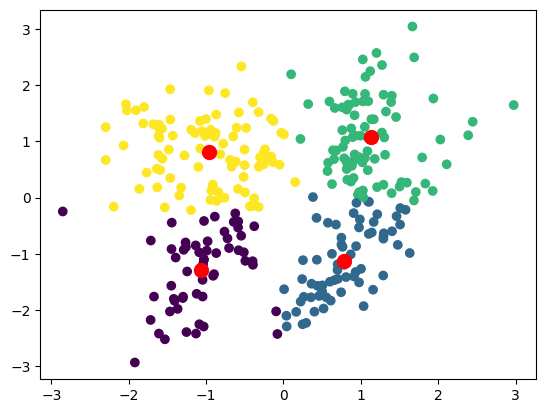

In [96]:
k = KMeans(K=4, max_iters=100)
y_pred = k.predict(data_1)
plt.scatter(data_1[:,0], data_1[:,1], c=y_pred)
plt.scatter(k.centroids[:,0], k.centroids[:,1], s=100, c='red')

## 2

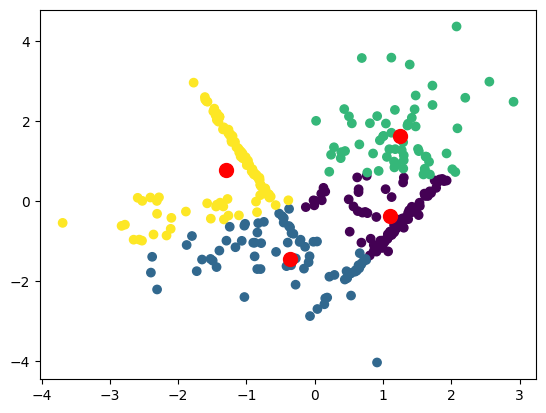

In [97]:
k = KMeans(K=4, max_iters=100)
y_pred = k.predict(data_2)
plt.scatter(data_2[:,0], data_2[:,1], c=y_pred)
plt.scatter(k.centroids[:,0], k.centroids[:,1], s=100, c='red')

## 3

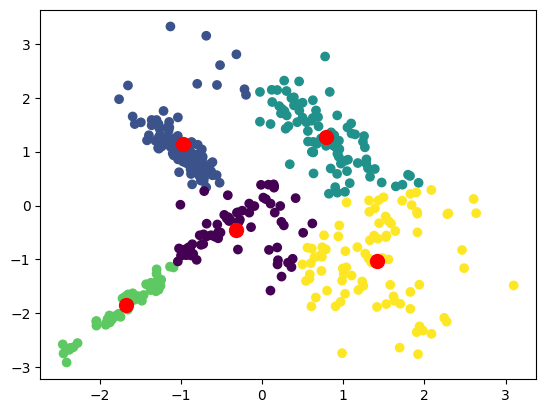

In [98]:
k = KMeans(K=5, max_iters=100)
y_pred = k.predict(data_3)
plt.scatter(data_3[:,0], data_3[:,1], c=y_pred)
plt.scatter(k.centroids[:,0], k.centroids[:,1], s=100, c='red')